In [1]:

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
pip install scikit-surprise

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
  Running setup.py install for scikit-surprise: started
  Running setup.py install for scikit-surprise: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [76 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\reader.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\trainset.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\utils.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\__init__.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\__main__.py -> build\lib.win-amd64-cpython-39\surprise
  creating build\lib.win-amd64-

In [3]:
data = pd.read_csv("book.csv", encoding = "latin1")

In [4]:
df = pd.DataFrame(data)

In [5]:
# Aggregate duplicate ratings by taking their mean
df = df.groupby(['User.ID', 'Book.Title'])['Book.Rating'].mean().reset_index()

In [6]:
# Create a user-item matrix
user_item_matrix = df.pivot(index='User.ID', columns='Book.Title', values='Book.Rating').fillna(0)

In [7]:
# Calculate cosine similarity between books
book_similarity = cosine_similarity(user_item_matrix.T)

In [8]:
# Create a DataFrame for book similarities
book_similarity_df = pd.DataFrame(book_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [9]:
# Function to get book recommendations based on cosine similarity
def get_book_recommendations(book_title, top_n=5):
    if book_title not in user_item_matrix.columns:
        return "Book not found in the dataset."
    
    # Get the similarity scores for the given book
    similar_books = book_similarity_df[book_title]
    
    # Sort books by similarity scores in descending order
    similar_books = similar_books.sort_values(ascending=False)
    
    # Exclude the input book itself
    similar_books = similar_books.drop(book_title)
    
    # Get the top N similar books
    top_similar_books = similar_books.head(top_n)
    
    return top_similar_books.index.tolist()

In [10]:
# 1_Example usage
input_book = "Clara Callan"
recommended_books = get_book_recommendations(input_book)
print(f"Recommended books for '{input_book}': {recommended_books}")

Recommended books for 'Clara Callan': ['Decision in Normandy', ' Jason, Madison &amp', 'Spy Catcher: The Candid Autobiography of a Senior Intelligence Officer', 'Spring Break', 'Spring Break (Sweet Valley High Super Edition, No 3)']


In [11]:
# 2_Example usage
input_book = "Classical Mythology"
recommended_books = get_book_recommendations(input_book)
print(f"Recommended books for '{input_book}': {recommended_books}")

Recommended books for 'Classical Mythology': ["Sprinter (Hunter's Western Series)", 'Spot Visits His Grandparents (Picture Puffins)', 'Spring Break', 'Spring Break (Sweet Valley High Super Edition, No 3)', 'Spring Collection']


In [12]:
# 3_Example usage
input_book = "The Mummies of Urumchi"
recommended_books = get_book_recommendations(input_book)
print(f"Recommended books for '{input_book}': {recommended_books}")

Recommended books for 'The Mummies of Urumchi': [' Jason, Madison &amp', 'Spy in the House of Love', 'Spring Break (Sweet Valley High Super Edition, No 3)', 'Spring Collection', 'Spring Fancy']


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Summary statistics
print(df.describe())

             User.ID  Book.Rating
count    9993.000000  9993.000000
mean    95342.799860     7.566597
std    117652.347377     1.820754
min         8.000000     1.000000
25%      2103.000000     7.000000
50%      3757.000000     8.000000
75%    162052.000000     9.000000
max    278854.000000    10.000000


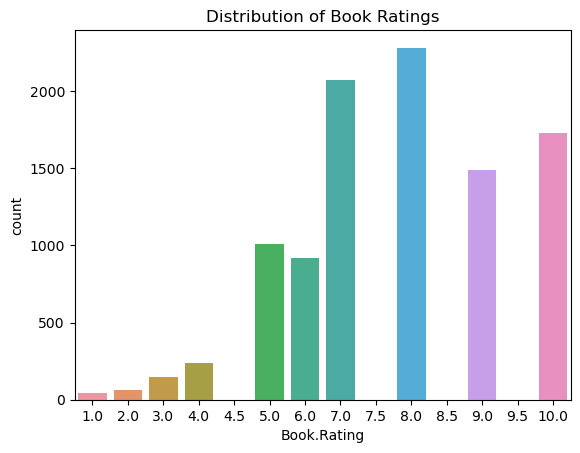

In [15]:
# Distribution of ratings
sns.countplot(x='Book.Rating', data=df)
plt.title('Distribution of Book Ratings')
plt.show()

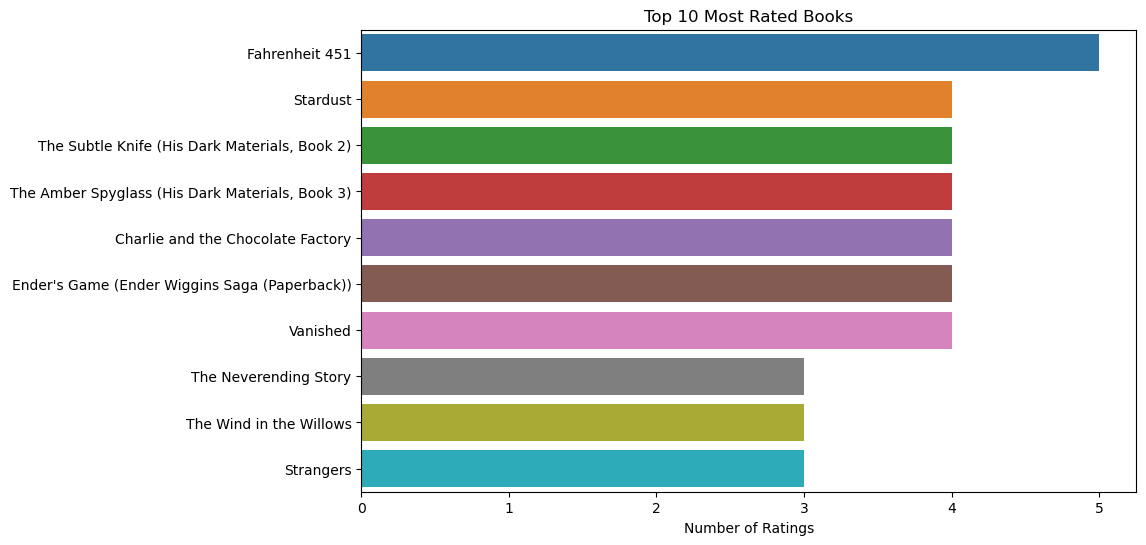

In [16]:
# Most rated books
most_rated_books = df['Book.Title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=most_rated_books.index, x=most_rated_books.values, orient='h')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.show()

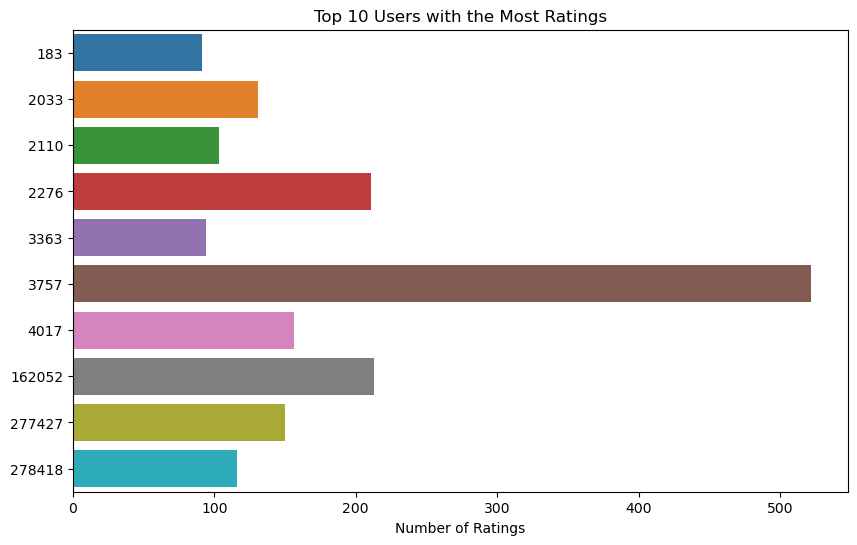

In [17]:
# Users with the most ratings
users_with_most_ratings = df['User.ID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=users_with_most_ratings.index, x=users_with_most_ratings.values, orient='h')
plt.title('Top 10 Users with the Most Ratings')
plt.xlabel('Number of Ratings')
plt.show()

In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.linalg import svds

In [35]:
# Create a user-item matrix
user_item_matrix = df.pivot(index='User.ID', columns='Book.Title', values='Book.Rating').fillna(0)

In [36]:
# 1. Euclidean Distance
euclidean_similarity = pairwise_distances(user_item_matrix.T, metric='euclidean')

In [37]:
# 2. Pearson Correlation
pearson_similarity = user_item_matrix.T.corr()

In [38]:
# 3. Cosine Similarity
cosine_similarity_matrix = cosine_similarity(user_item_matrix.T)

In [39]:
# Collaborative Filtering Methods

# 1. User-Based Collaborative Filtering with k-Nearest Neighbors (KNN)
knn_model = NearestNeighbors(n_neighbors=3, metric='cosine')
knn_model.fit(user_item_matrix.T)
distances, indices = knn_model.kneighbors(user_item_matrix.T, n_neighbors=3)

In [40]:
# 2. Matrix Factorization with Singular Value Decomposition (SVD)
user_item_matrix_np = user_item_matrix.to_numpy()  # Convert to a NumPy array
U, sigma, Vt = svds(user_item_matrix_np, k=2)
predicted_ratings = np.dot(np.dot(U, np.diag(sigma)), Vt)

In [41]:
# Print results or use them as needed
print("Euclidean Similarity:")
print(euclidean_similarity)

Euclidean Similarity:
[[ 0.          2.          4.         ... 10.63014581  9.43398113
   8.94427191]
 [ 2.          0.          2.         ...  9.21954446  7.81024968
   7.21110255]
 [ 4.          2.          0.         ...  8.06225775  6.40312424
   5.65685425]
 ...
 [10.63014581  9.21954446  8.06225775 ...  0.          8.60232527
   8.06225775]
 [ 9.43398113  7.81024968  6.40312424 ...  8.60232527  0.
   6.40312424]
 [ 8.94427191  7.21110255  5.65685425 ...  8.06225775  6.40312424
   0.        ]]


In [42]:
print("\nPearson Correlation:")
print(pearson_similarity)


Pearson Correlation:
User.ID    8         9         10        12        14        16        17      \
User.ID                                                                         
8        1.000000 -0.000272 -0.000272 -0.000272 -0.000469 -0.000272 -0.000523   
9       -0.000272  1.000000 -0.000104 -0.000104 -0.000179 -0.000104 -0.000199   
10      -0.000272 -0.000104  1.000000 -0.000104 -0.000179 -0.000104 -0.000199   
12      -0.000272 -0.000104 -0.000104  1.000000 -0.000179 -0.000104 -0.000199   
14      -0.000469 -0.000179 -0.000179 -0.000179  1.000000 -0.000179 -0.000344   
...           ...       ...       ...       ...       ...       ...       ...   
278846  -0.000272 -0.000104 -0.000104 -0.000104 -0.000179 -0.000104 -0.000199   
278849  -0.000272 -0.000104 -0.000104 -0.000104 -0.000179 -0.000104 -0.000199   
278851  -0.000991 -0.000378 -0.000378 -0.000378 -0.000652 -0.000378 -0.000727   
278852  -0.000272 -0.000104 -0.000104 -0.000104 -0.000179 -0.000104 -0.000199   
278854

In [43]:
print("\nCosine Similarity:")
print(cosine_similarity_matrix)


Cosine Similarity:
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [44]:
print("\nK-Nearest Neighbors (User-Based Collaborative Filtering):")
print(indices)


K-Nearest Neighbors (User-Based Collaborative Filtering):
[[   0    1    2]
 [   0    1    2]
 [   0    1    2]
 ...
 [2424 2563 3265]
 [ 539 2672 3836]
 [   5   17   36]]


In [45]:
print("\nMatrix Factorization with SVD (Predicted Ratings):")
print(predicted_ratings)


Matrix Factorization with SVD (Predicted Ratings):
[[-2.30745618e-35 -1.96976733e-35 -2.47432073e-35 ...  4.54351134e-34
   1.09851960e-33  1.50186793e-17]
 [-2.03291347e-37  5.64205737e-38 -6.46851830e-38 ... -4.24851400e-36
  -4.71972491e-36  1.32316726e-19]
 [ 2.21213595e-34 -6.03162170e-35  7.11067998e-35 ...  4.58436904e-33
   5.06829786e-33 -1.43981826e-16]
 ...
 [ 5.90195536e-35 -4.21701528e-35  1.58598592e-36 ...  2.15882784e-33
   2.98495569e-33 -3.84141153e-17]
 [ 1.84824083e-34 -3.77629390e-35  6.78306343e-35 ...  3.37700797e-33
   3.44371796e-33 -1.20296938e-16]
 [-9.16835073e-37  4.92047242e-36  2.81895139e-36 ... -1.86586247e-34
  -3.13426041e-34  5.96727623e-19]]
